# Autocorrelation (ACF) and PACF
We can learn some important properties of our time series data with the help of Auto Correlation(ACF) and Partial Auto Correlation (PACF) graphs. This provide useful descriptive properties for understanding which model can be used for time series forecasting

ACF measures the linear relationships between observations at different time lags. In other words ACF is used to understand if there exists a correlation between a time series data point with another point as a function of their time difference

ACF is also called as Correlogram and a Correlogram for a Stationary process is used to Interpret Random Series, Short term correlation and Alternation Series

We will be using statsmodel Graphics API’s to plot the correlation graphs. It basically uses the matplotlib cross-correlation (xcorr) and auto correlation(acorr) under the hood. Check this matplotlib documenation

We have total 20 lags on X-axis and auto Correlation on the Y-axis and the line at Y=0 is the mean. All the correlation values are above the mean and a positive value


The Partial Auto Correlation factor (PACF) is the partial correlation between the two points at a specific lag of time. plotting the partial autocorrelative functions one could determine the appropriate lags p in an AR (p) model or in an extended ARIMA (p,d,q) model

For an Autoregressive AR (p) process, the partial autocorrelation(pacf) function is defined as the value of the last coefficient(alpha-p)

We will use the statsmodel graphical tools for plotting the pacf plot here

This gives an indication of Stationary time series with most of the auto correlation is above or below the mean

PACF shows which data points are informative for specific lags and provides a contrast to the ACF

In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
def plot_acf_pacf(ts, nlags=50, title=''):
    """Make a plot of the ACF and PACF of a pandas time-series. In case there are missing values, the PACF
    cannot be computed."""

    def _plot_cf(ax, x, cf, ci):
        for xx, yy in zip(x, cf):
            ax.vlines(xx,[0],yy)
        ax.plot(x, cf, 'o')
        ax.fill_between(x, ci[:,0]-cf, ci[:,1]-cf, alpha=0.2)
        ax.set_xlabel("lags")

    x = np.arange(nlags+1)
    acf, acf_ci = sm.tsa.acf(ts, nlags=nlags, missing="drop", alpha=0.05)

    fig = plt.figure(figsize=(11,9))
    if ts.isna().sum() == 0:
        ax = fig.add_subplot(211)
    else:
        ax = fig.add_subplot(111)

    _plot_cf(ax, x, acf, acf_ci)

    if ts.isna().sum() == 0:
        pacf, pacf_ci = sm.tsa.pacf(ts, nlags=nlags, alpha=0.05) # Cannot handle missing values!
        ax = fig.add_subplot(212)
        _plot_cf(ax, x, pacf, pacf_ci)
    fig.suptitle(title)

In [3]:
def plot_lag_scatter(ts, nlags=5, return_data=False, title=''):
    """Creates scatter plots up to a certain number of lags. Adds local linear regression line
    to each scatter plot, and compute correlation coefficient for each lag."""

    MAX_SUBFIGS_PER_ROW = 5 # Number of subfigures before a "line break".
    FIGSIZE_PER_SUBFIG = 3  # Amount the total figure size is increased per subfigure.

    lag_data = {}
    for lag in range(nlags+1):
        key = "lag_%d" % lag
        if lag == 0:
            lag_data.update({key: ts.values[(nlags-lag):].ravel()})
        else:
            lag_data.update({key: ts.values[(nlags-lag):(-lag)].ravel()})

    # DataFrame with all lags
    df = pd.DataFrame().from_dict(lag_data)

    # Create matrix of figures.
    nrows = int((nlags-0.1) / MAX_SUBFIGS_PER_ROW) + 1
    ncols = min(nlags, MAX_SUBFIGS_PER_ROW)
    fig = plt.figure(figsize=(FIGSIZE_PER_SUBFIG * ncols, FIGSIZE_PER_SUBFIG * nrows))

    auto_correlations = df.corr('pearson')

    for lag in range(1,nlags+1):
        ax = fig.add_subplot(nrows, ncols, lag)
        sns.regplot(x="lag_0", y="lag_%d" % lag, data=df, lowess=True,
                    scatter_kws={'color':'steelblue'},
                    line_kws={'color':'orangered', 'label': 'LOESS'})

        plt.title("Corr: %f" % auto_correlations.loc["lag_0", "lag_%d" % lag])

        if lag == 1:
            plt.legend()
    fig.suptitle(title)

    fig.tight_layout()

    if return_data:
        return df

In [20]:
def plot_time_lagged_cross_correlation(df, target, max_lag=21):
    lagged_correlation = pd.DataFrame.from_dict({x: [df[target].corr(df[x].shift(-t)) for t in range(max_lag)] for x in df.columns}).diff()
    
    fig = plt.figure(figsize=(11,9))
    sns.heatmap(lagged_correlation, vmin=-0.2, vmax=0.2, cmap='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureW

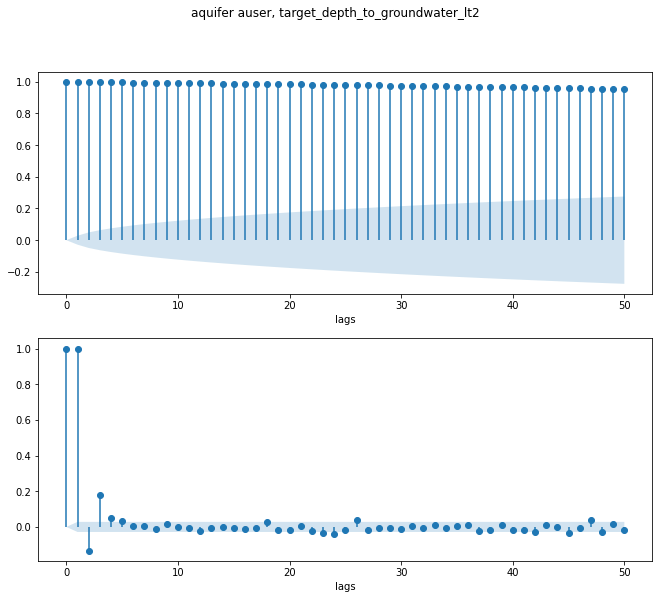

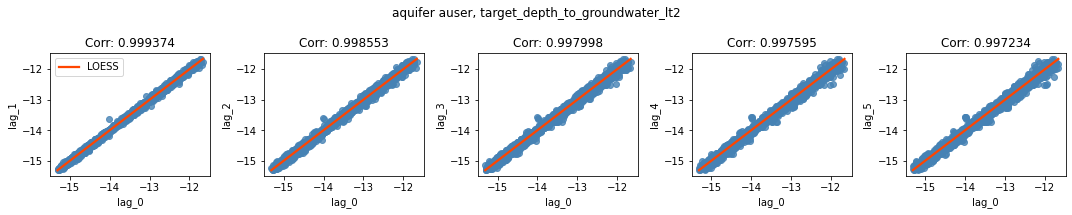

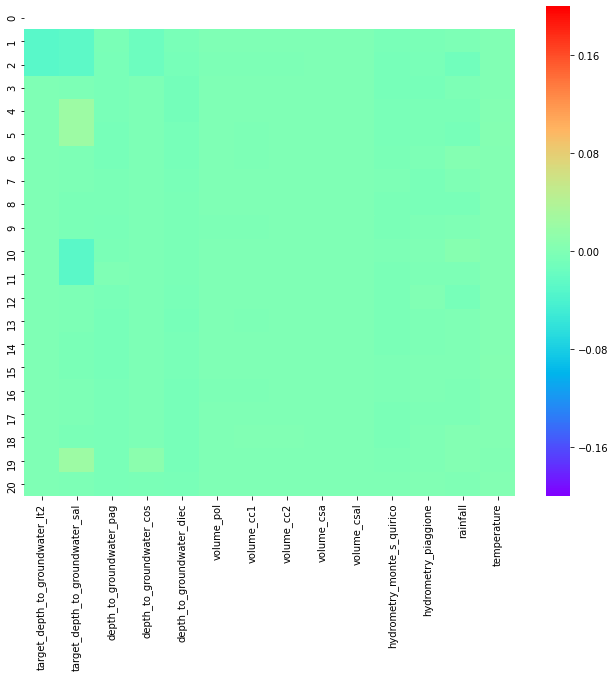

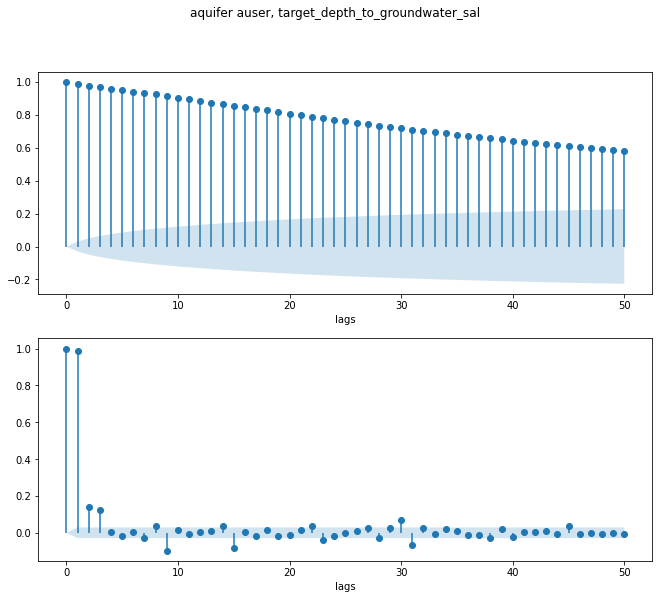

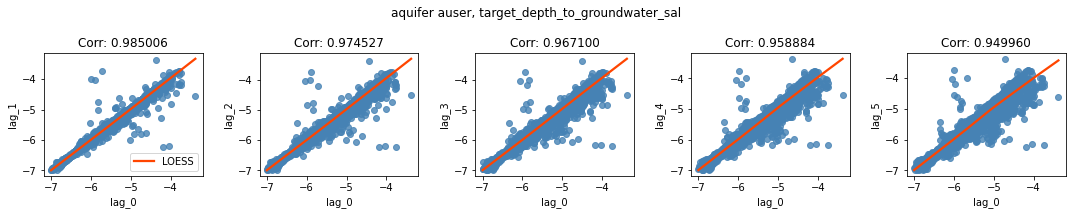

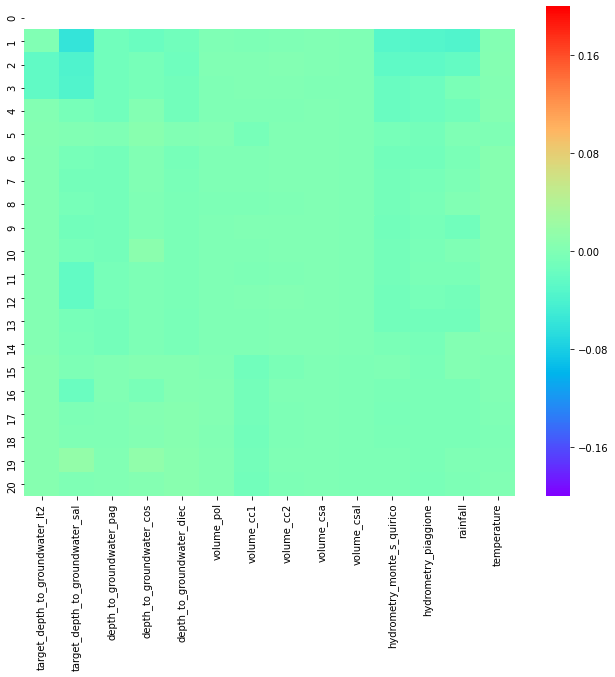

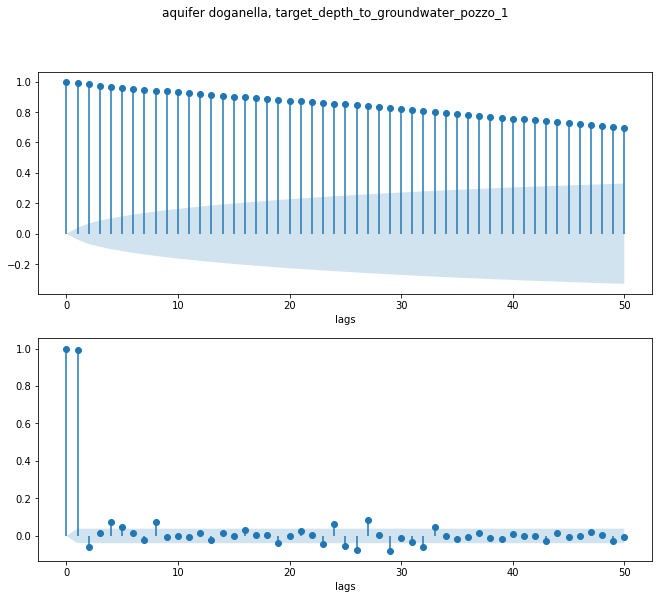

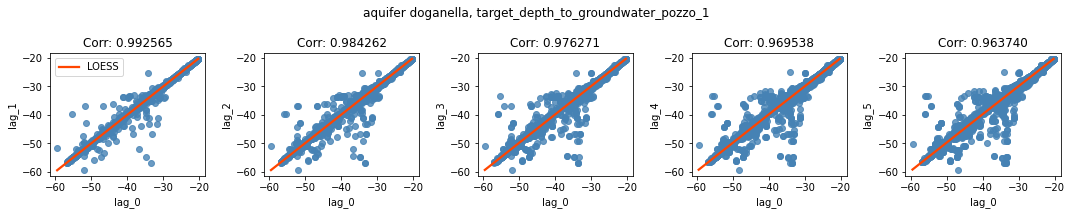

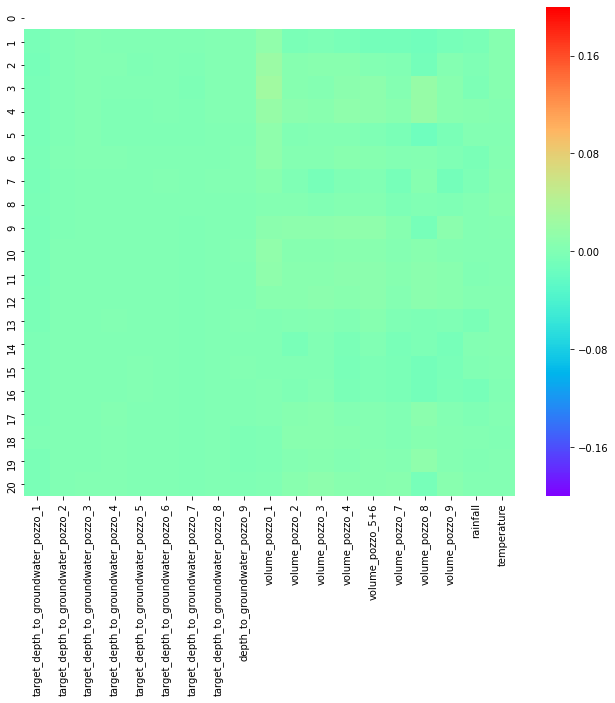

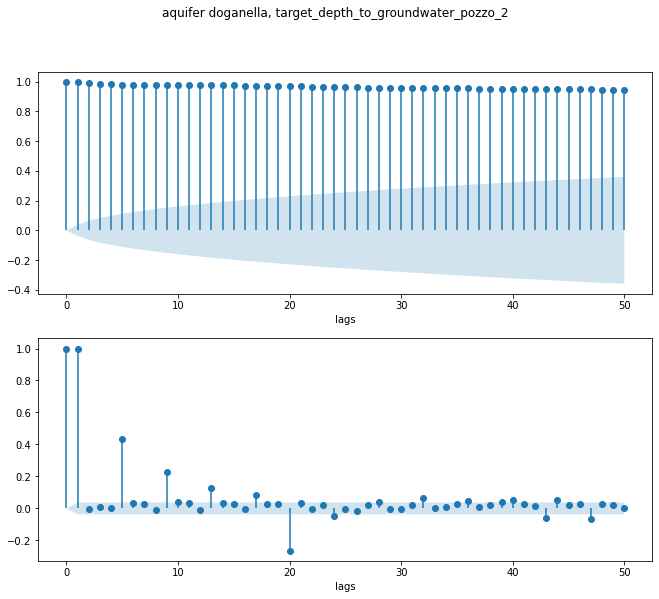

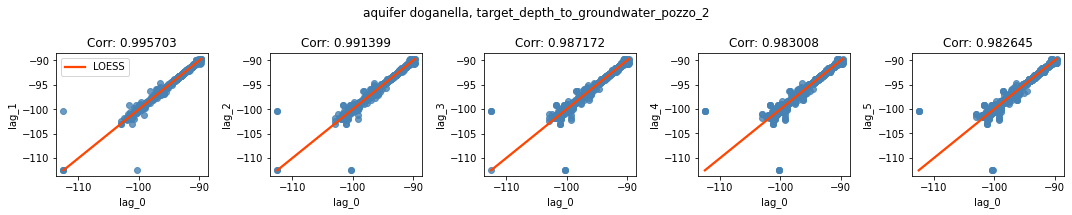

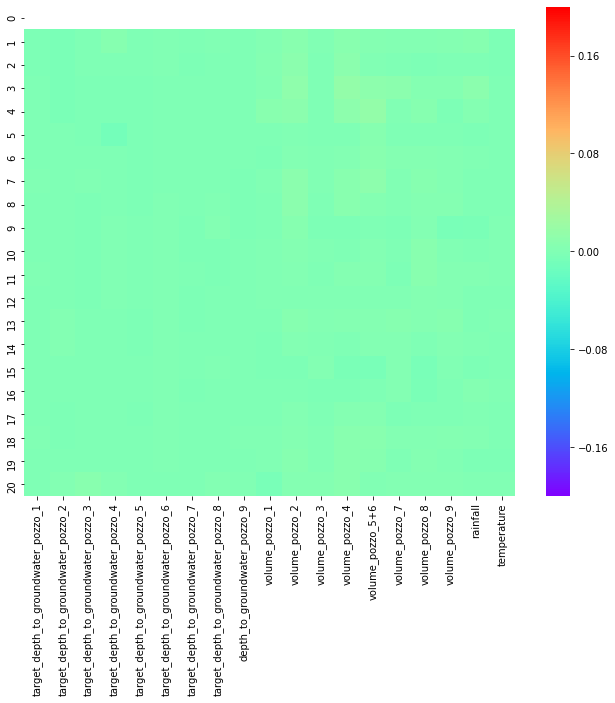

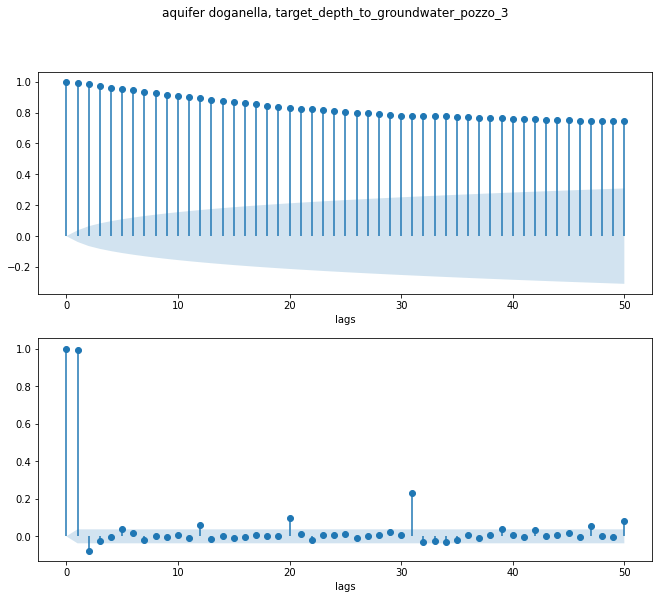

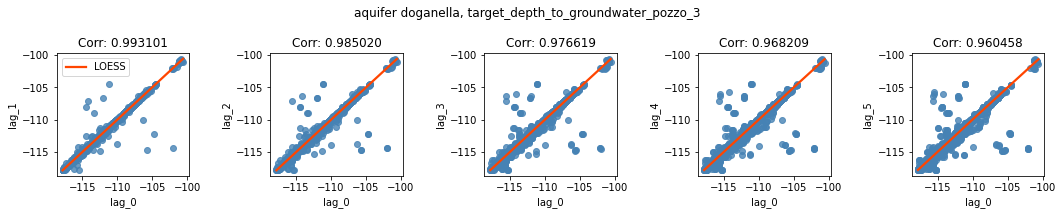

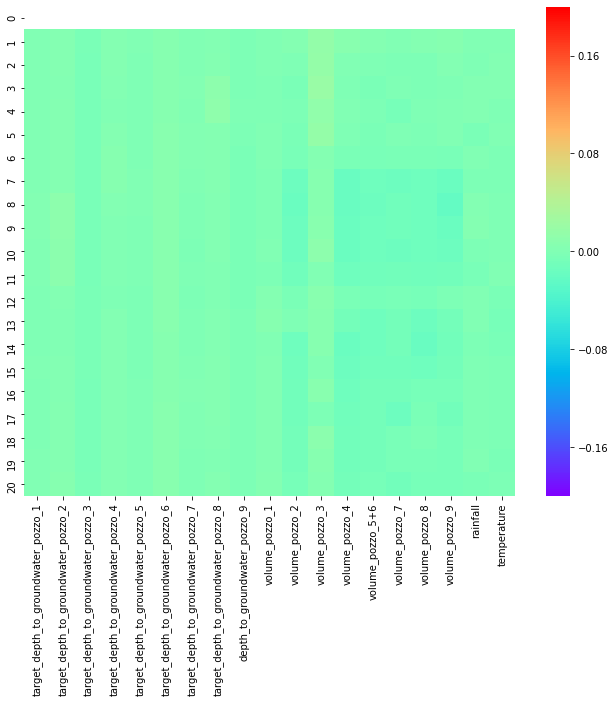

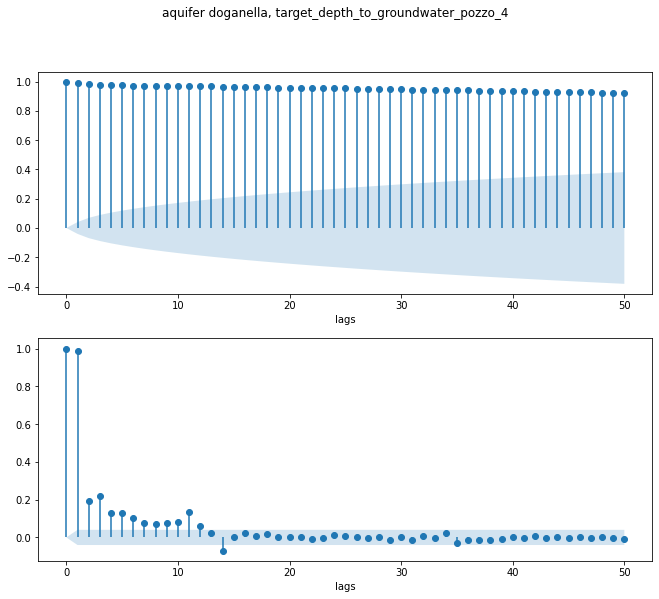

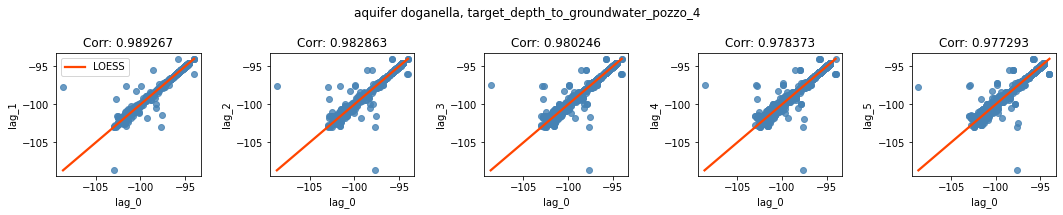

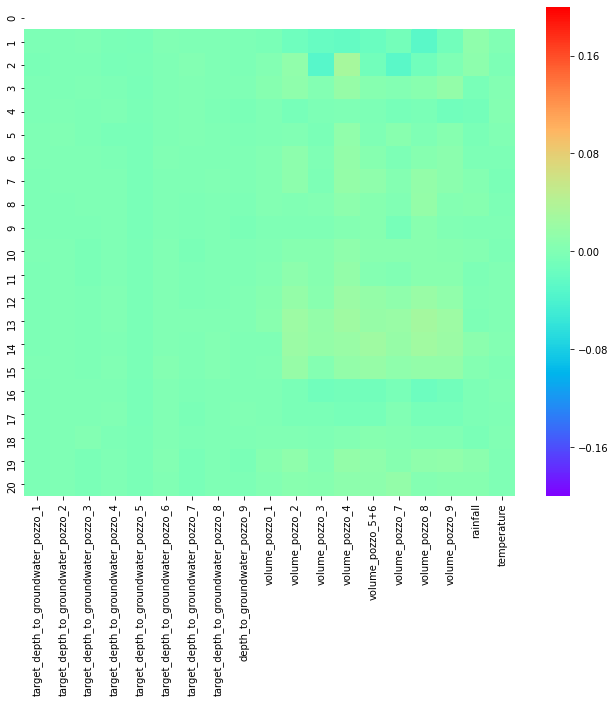

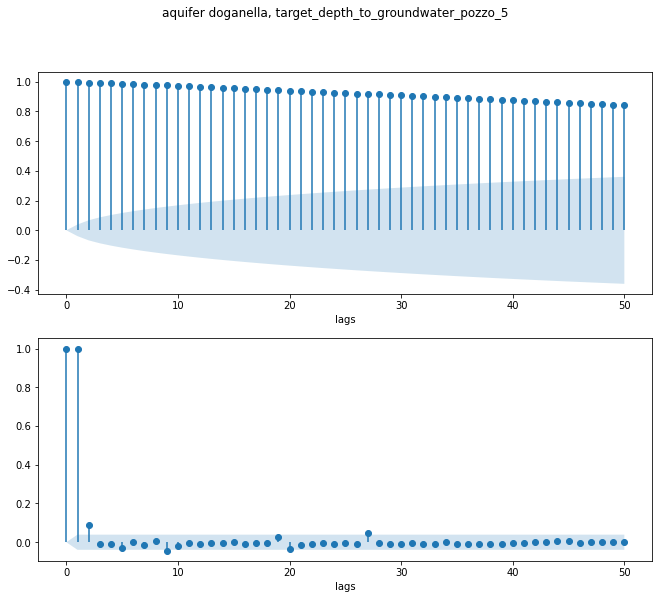

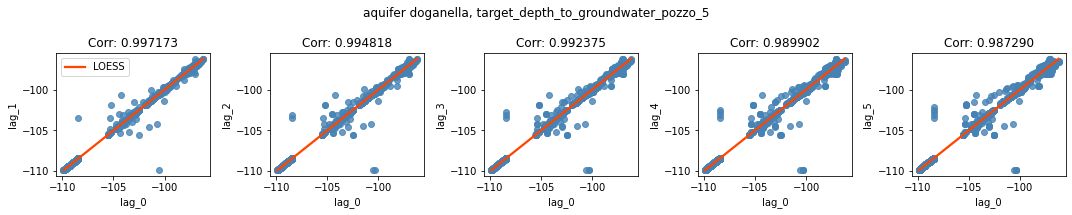

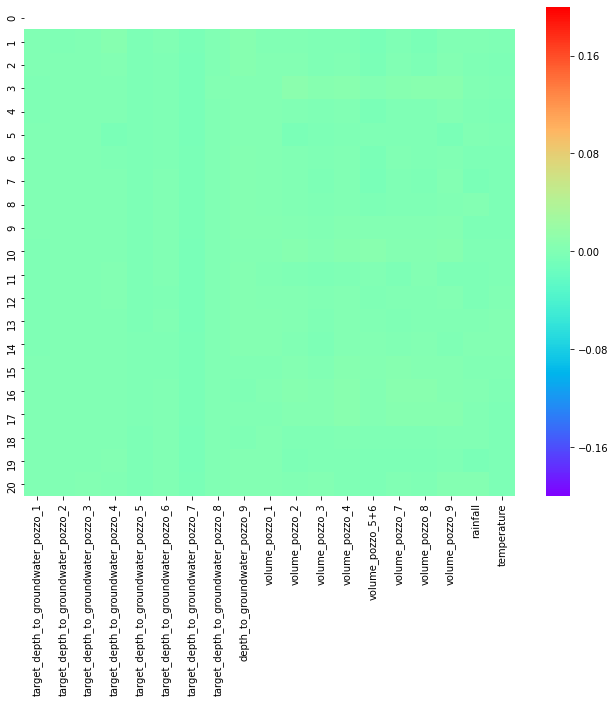

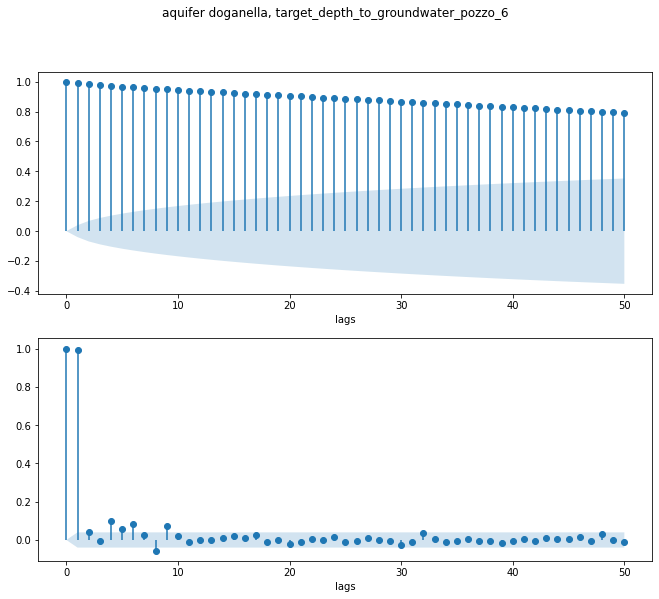

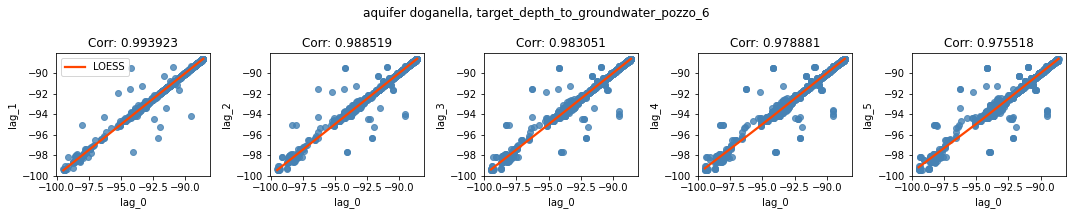

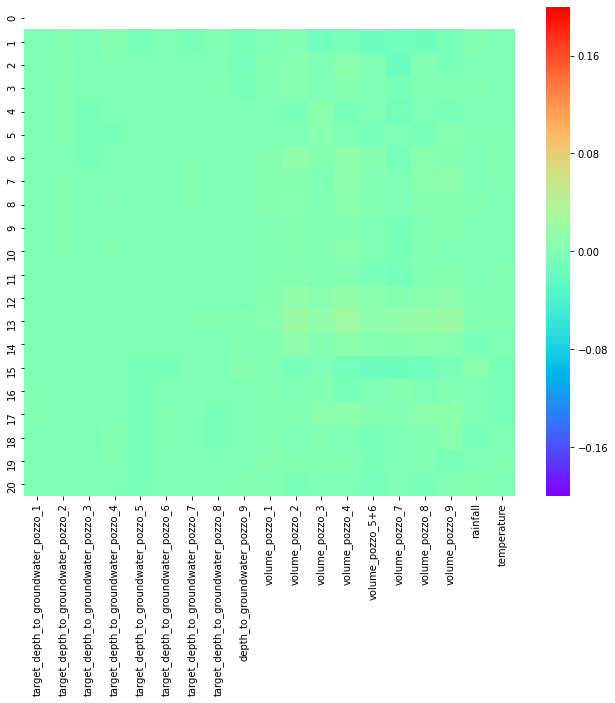

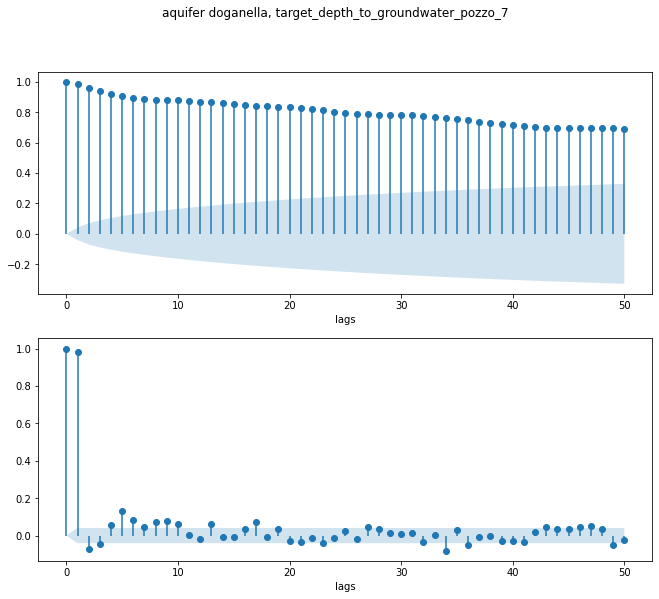

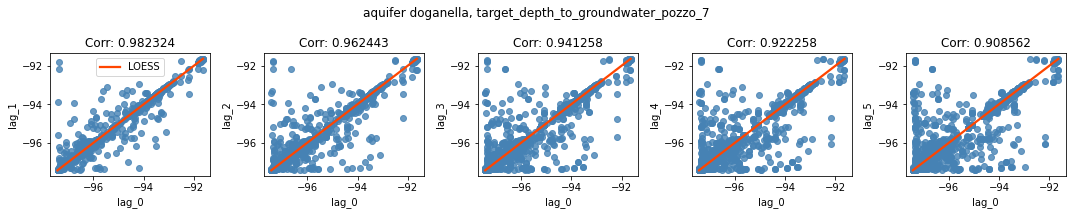

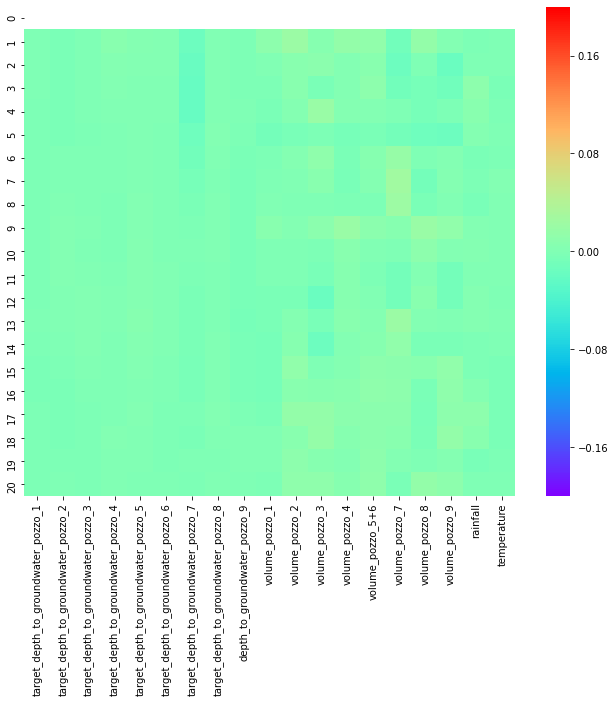

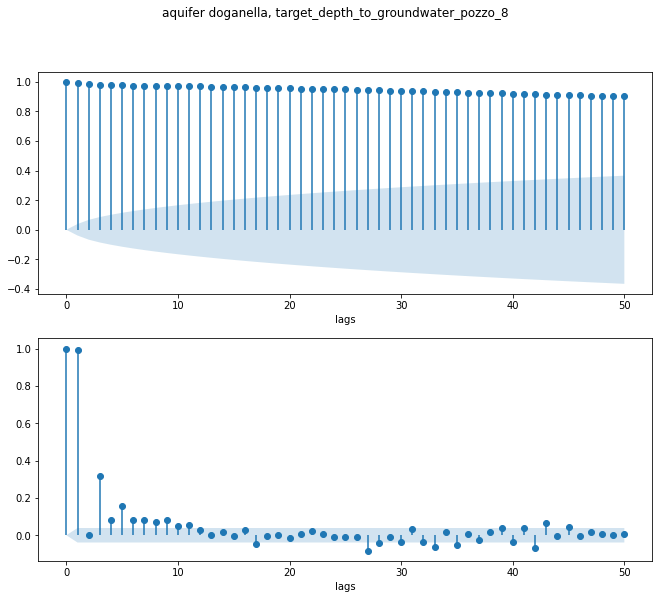

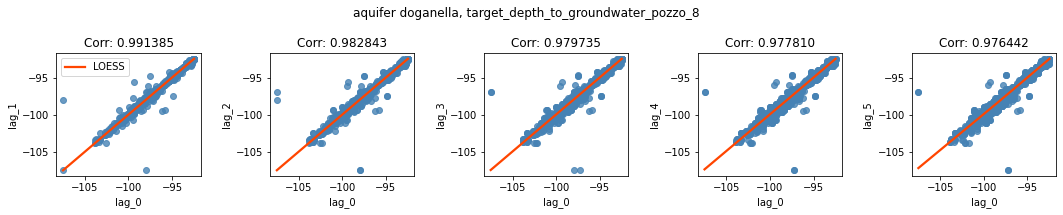

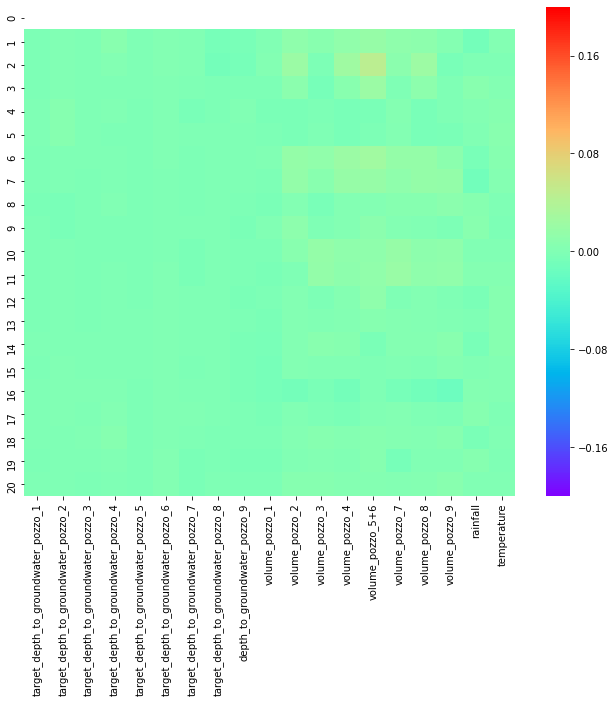

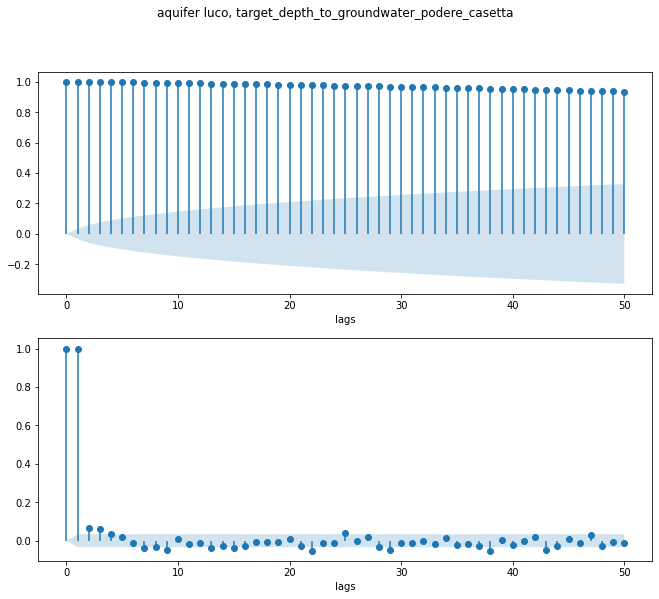

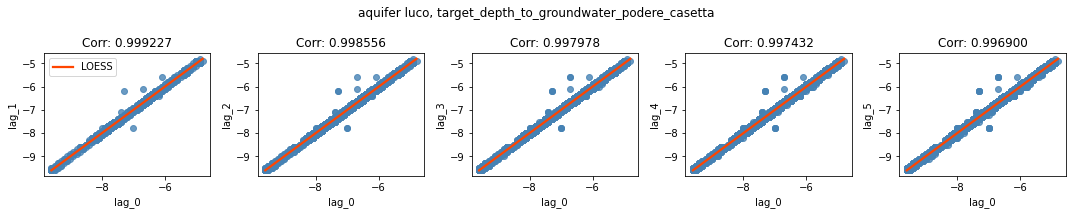

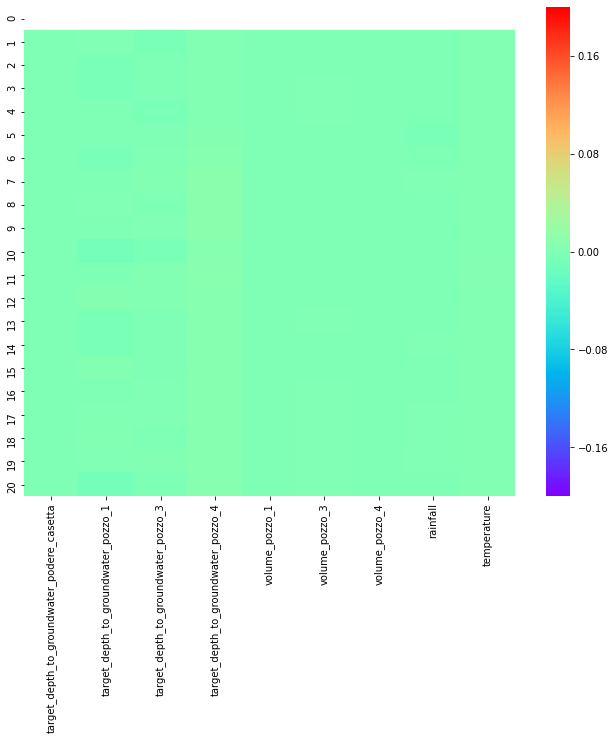

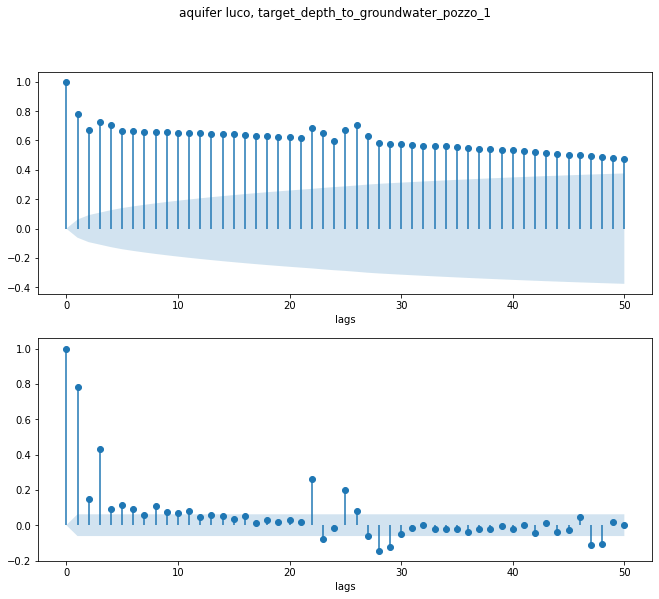

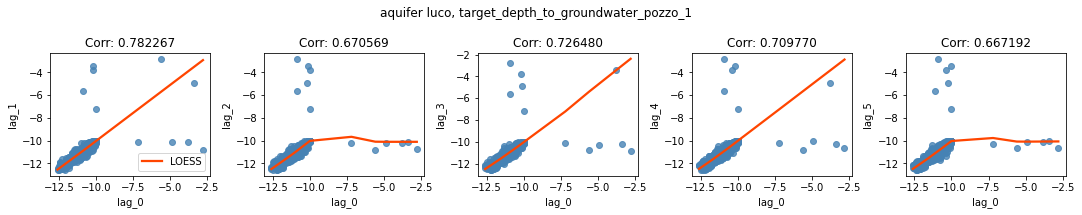

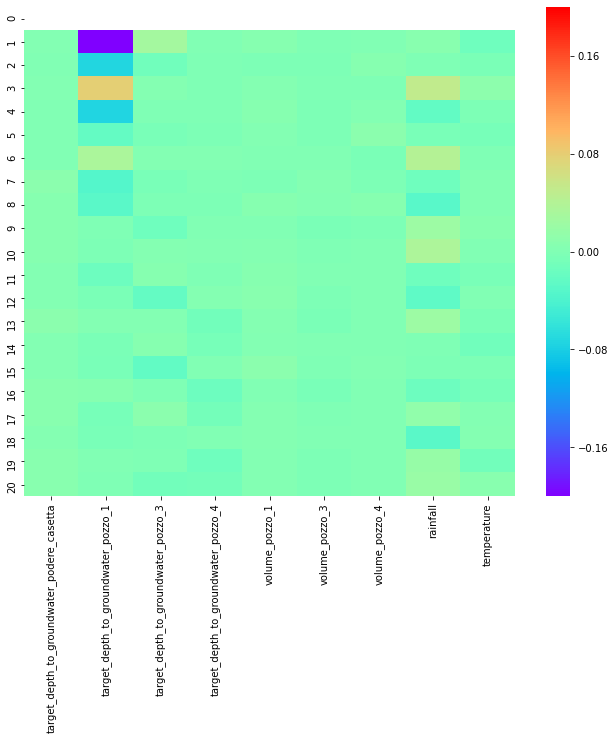

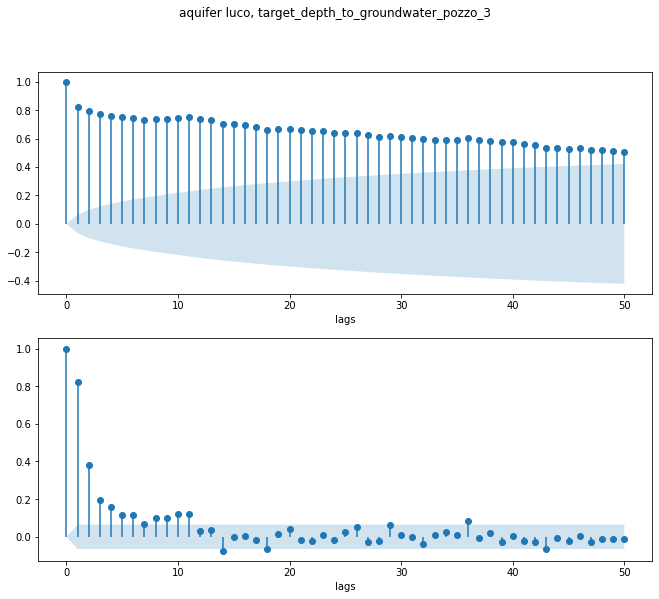

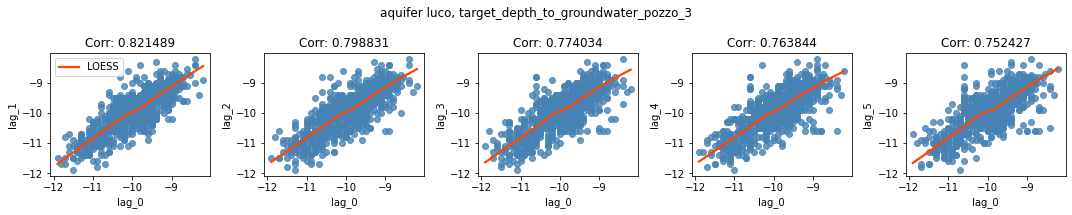

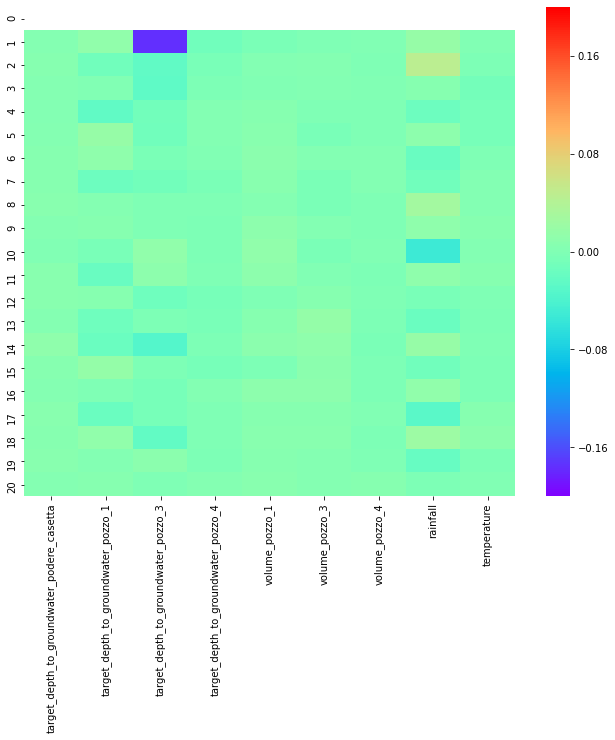

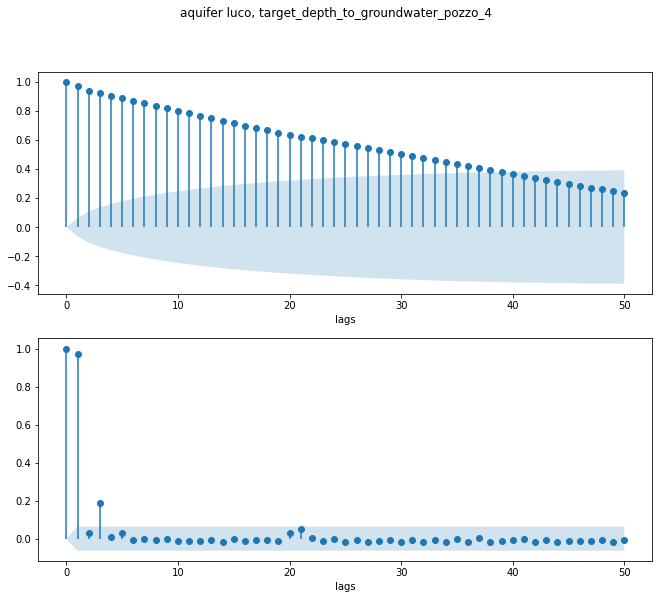

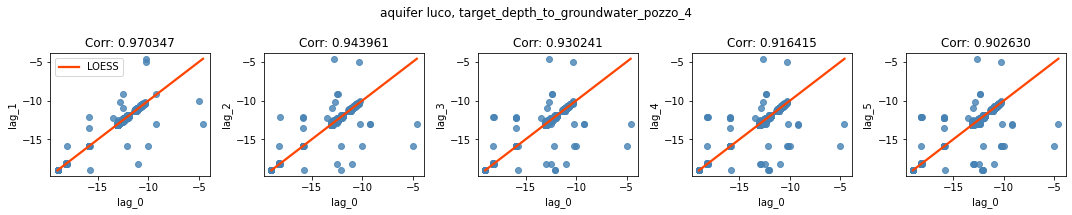

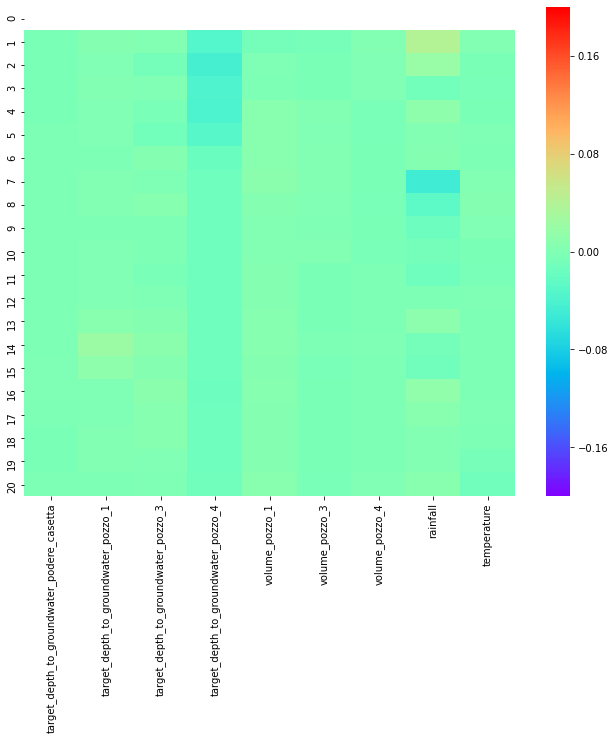

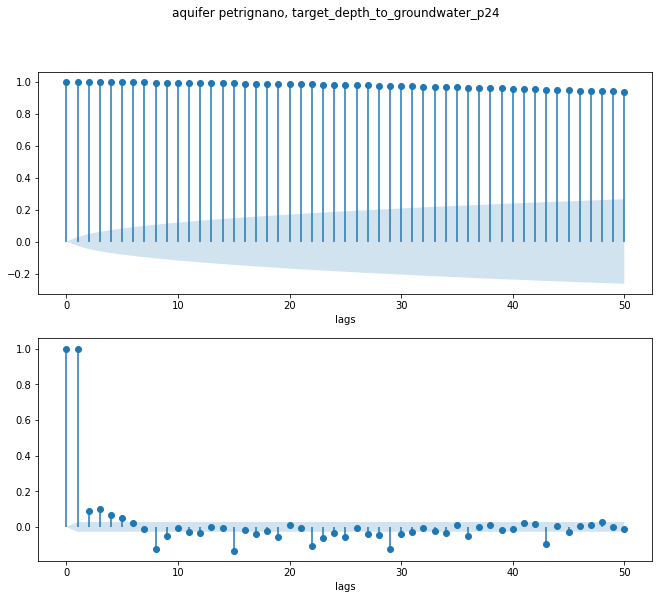

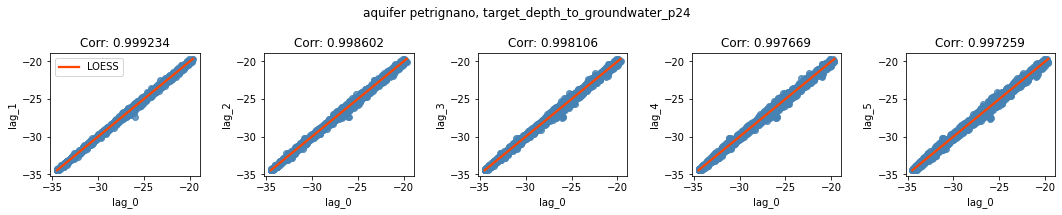

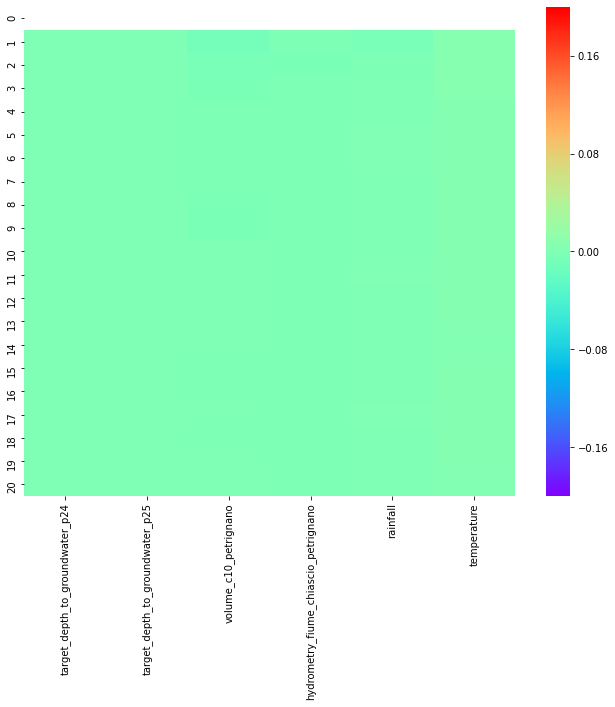

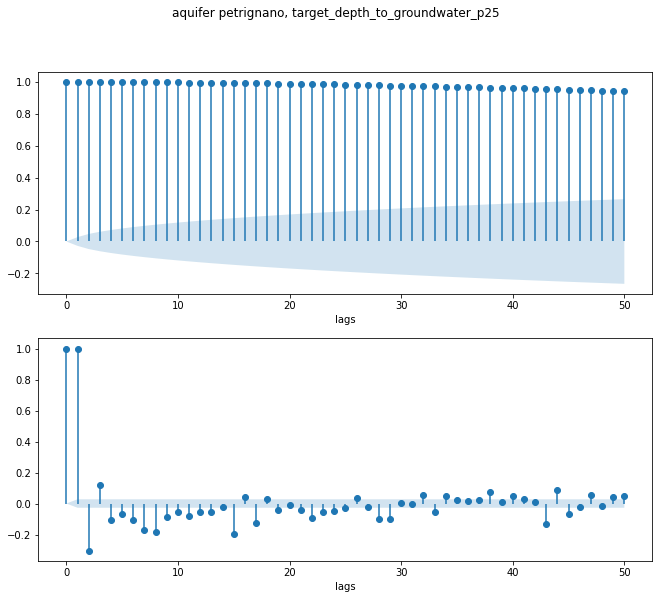

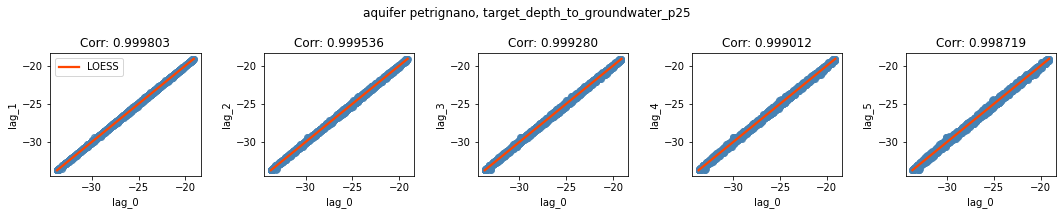

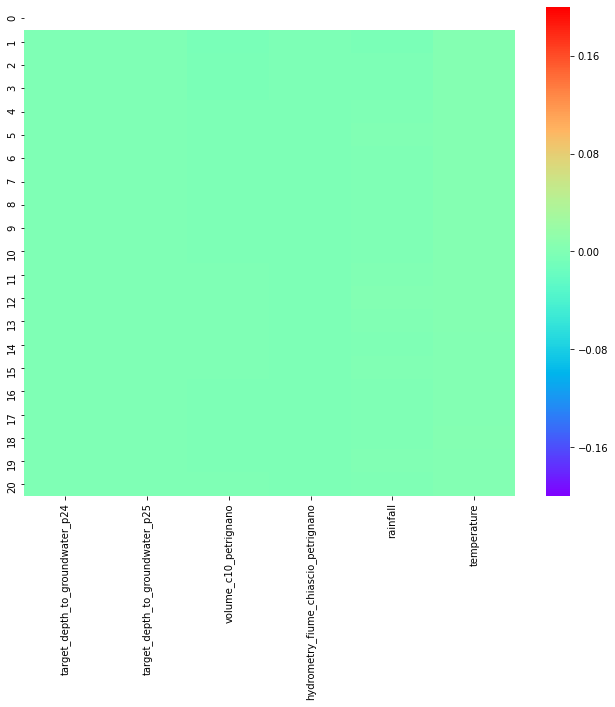

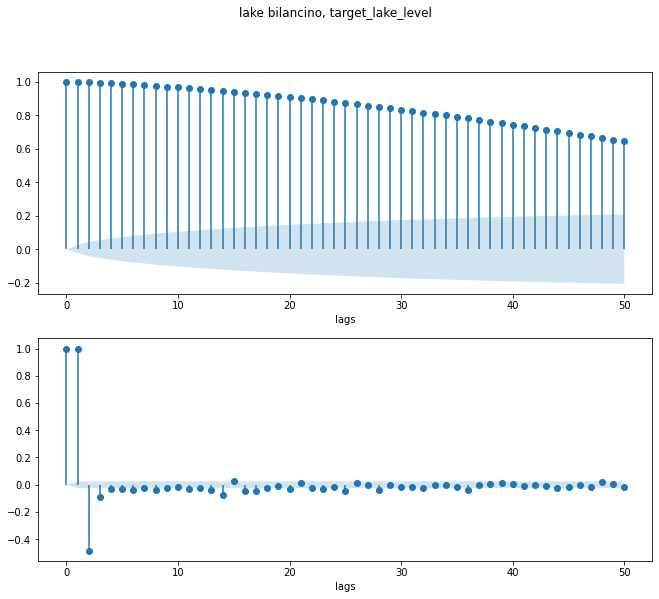

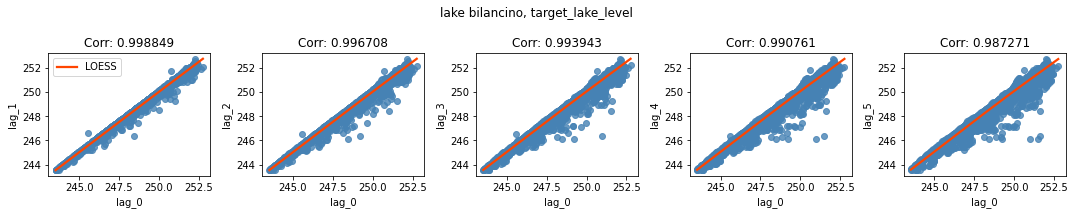

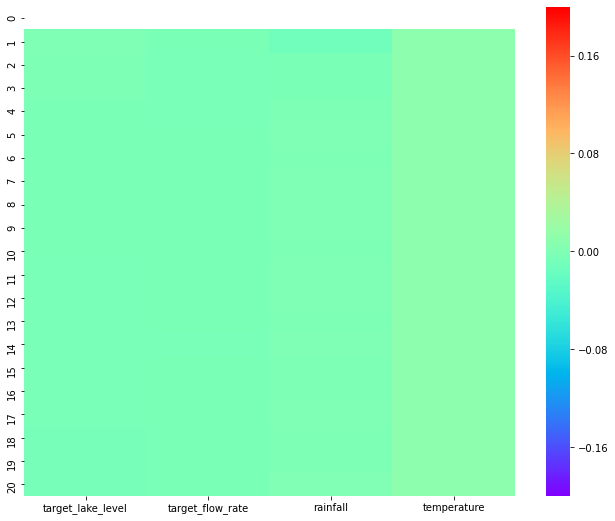

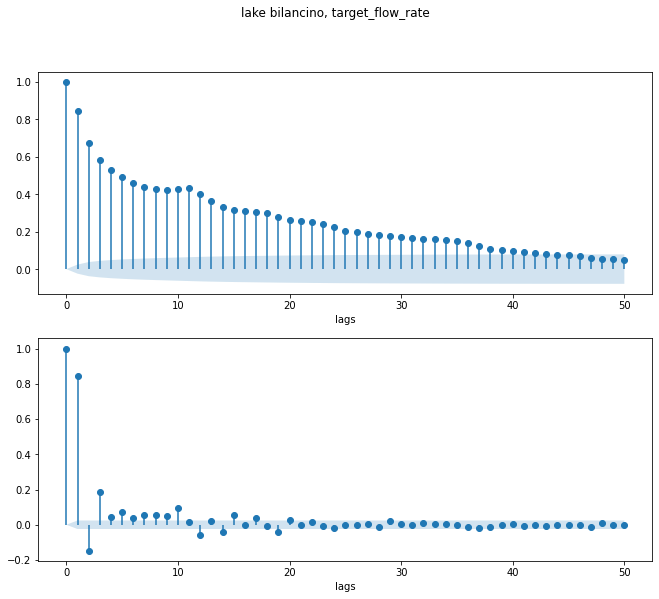

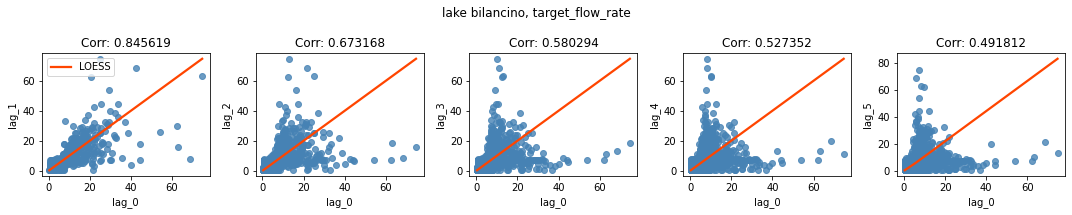

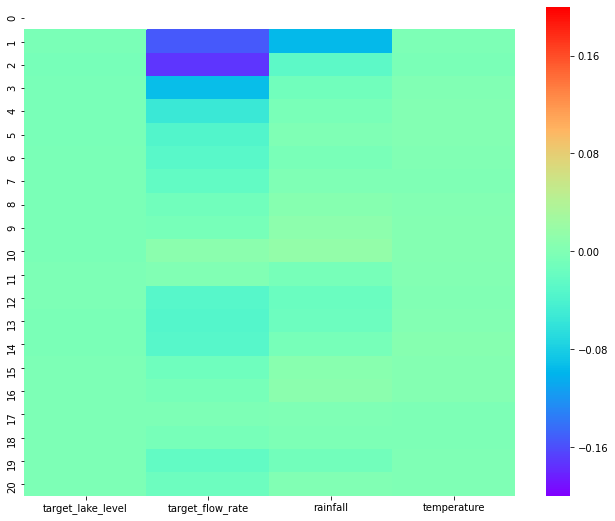

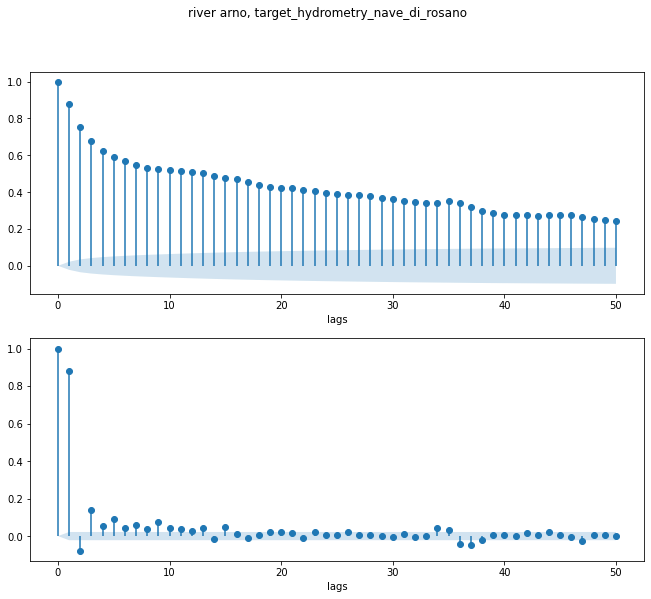

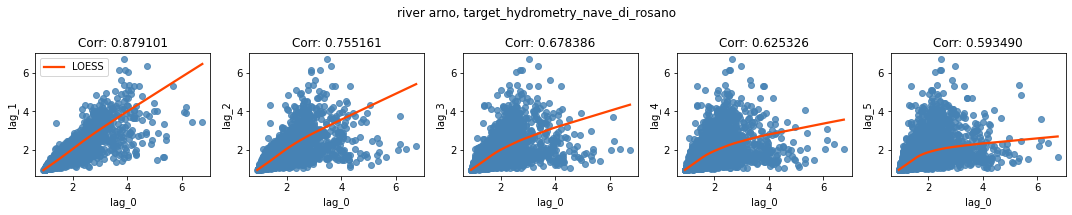

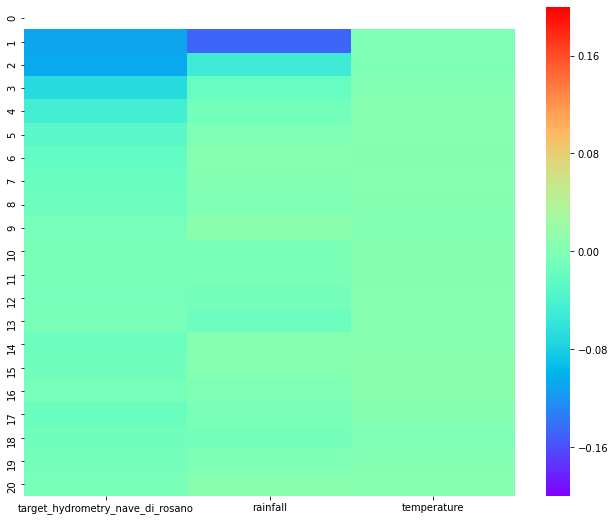

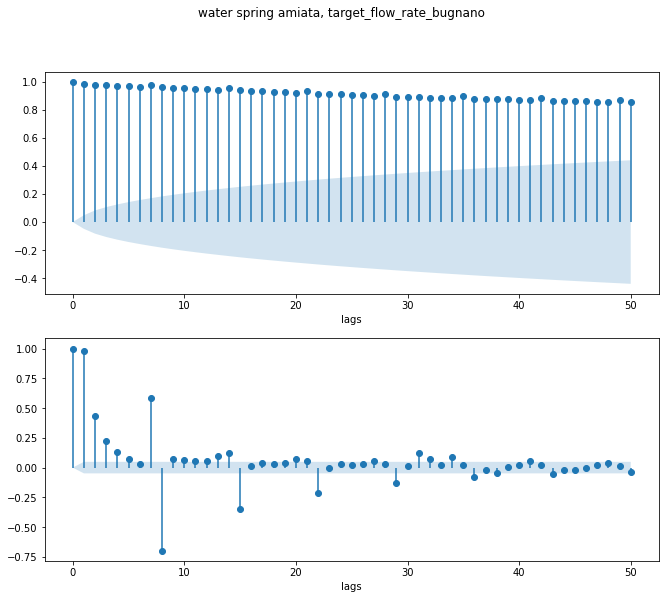

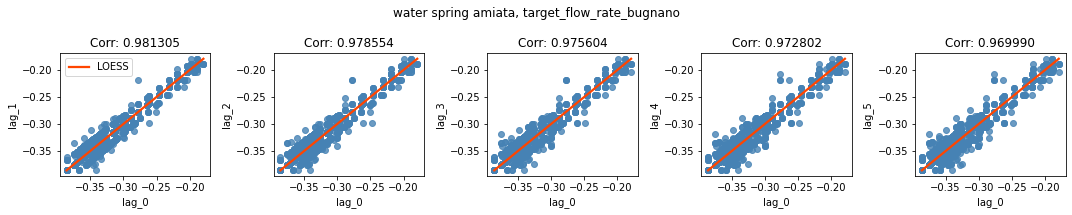

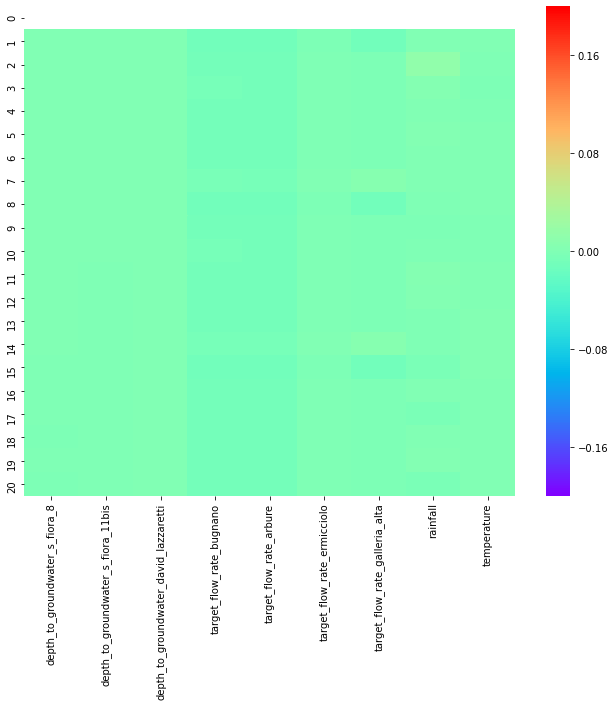

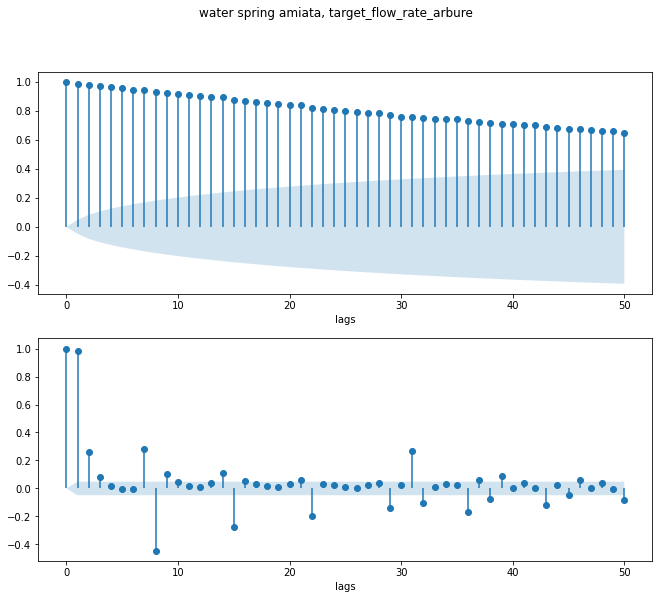

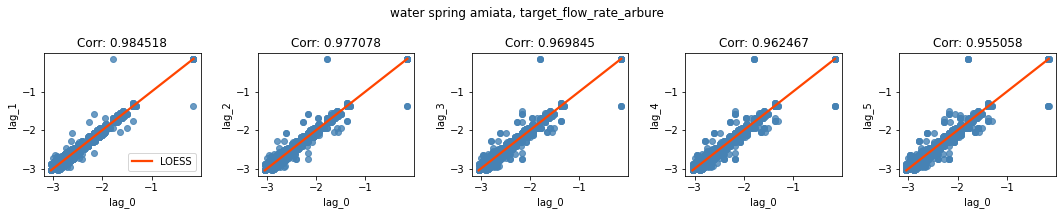

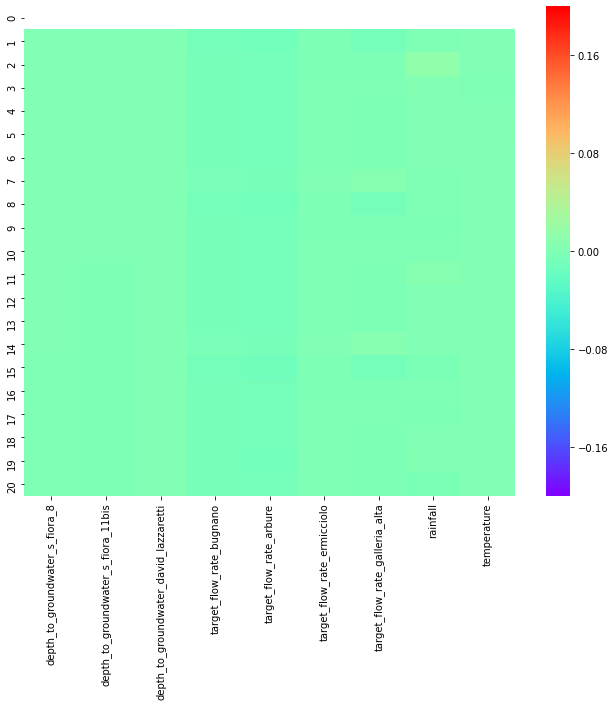

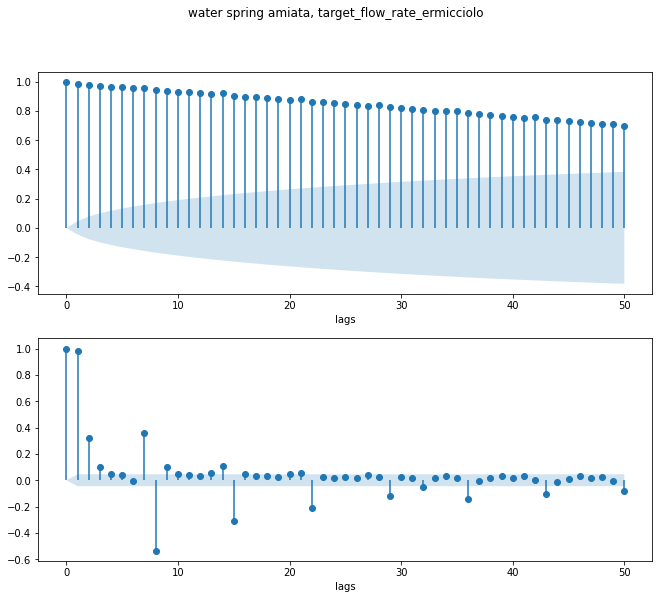

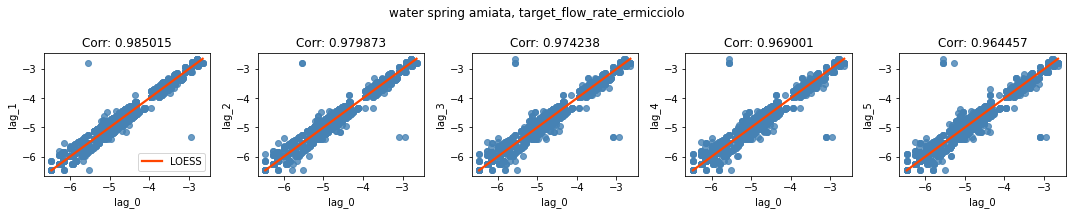

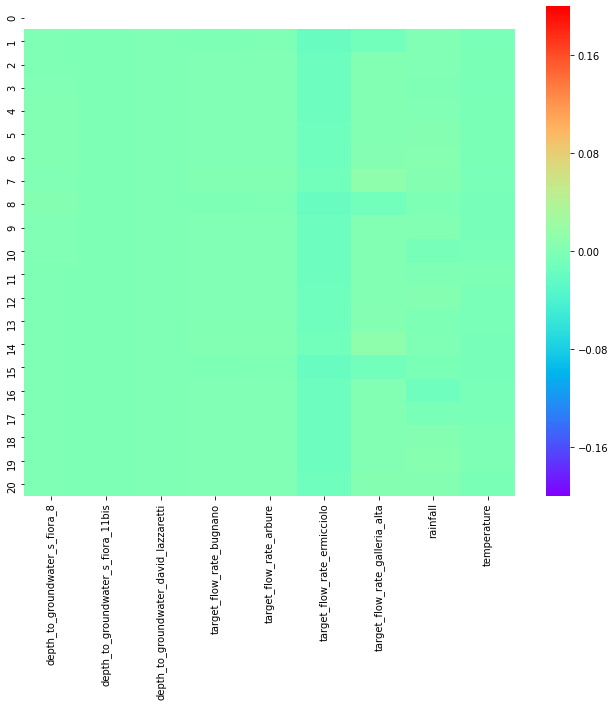

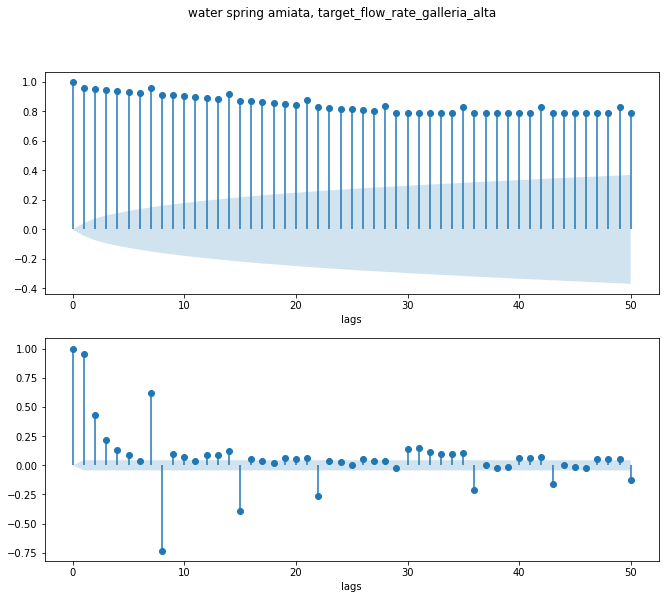

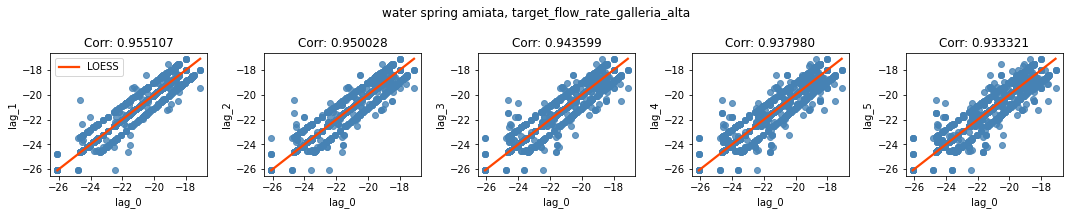

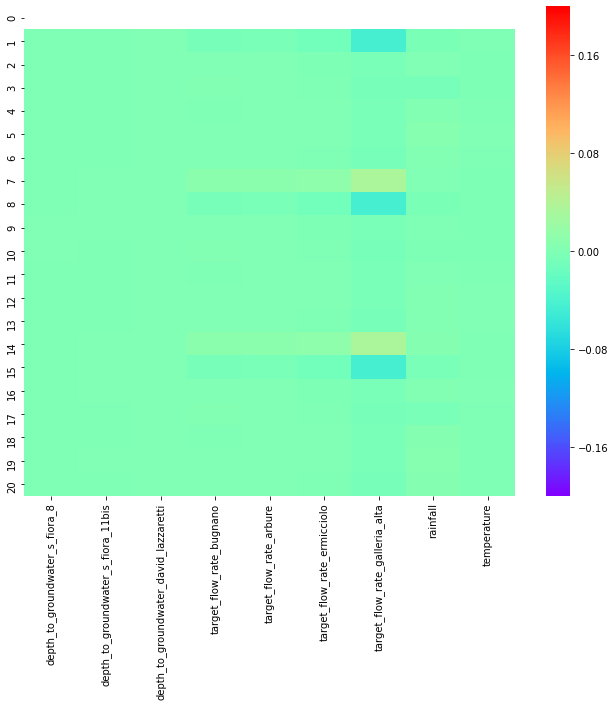

In [21]:
for fname in glob.glob("./data/kaggle-preprocessed/*.feather"):
    df = pd.read_feather(fname)
    df = df.set_index(df.index_col)
    df = df.drop("index_col", axis=1).drop("Date", axis=1)
    rainfall_columns = [col for col in df.columns if 'rainfall' in col]
    temperature_columns = [col for col in df.columns if 'temperature' in col]
    df['rainfall'] = df[rainfall_columns].sum(axis=1)
    df['temperature'] = df[temperature_columns].mean(axis=1)
    df.drop(columns=rainfall_columns, inplace=True)
    df.drop(columns=temperature_columns, inplace=True)
    df.drop(columns=['year', 'month', 'week', 'day', 'day_of_year'], inplace=True)
    target_cols = [col for col in df.columns if 'target' in col]
    for target in target_cols:
        ts = df[target]
        ts = ts[ts != 0].dropna()
        plot_acf_pacf(ts, title='{}, {}'.format(fname.split("\\")[-1].split(".")[0].replace('_', ' '), target))
        plot_lag_scatter(ts, title='{}, {}'.format(fname.split("\\")[-1].split(".")[0].replace('_', ' '), target))
        plot_time_lagged_cross_correlation(df, target=target)    